In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# DATA READING

In [2]:
data = pd.read_csv("C:/Users/HP/Desktop/CSV_Files/haberman.csv" ,header = None , names = ["Age","Year","Nodes","Survival"])

In [3]:
data

,Age,Year,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


**Checking top 5 rows**

In [4]:
data.head()

,Age,Year,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**Accessing all column at once**

In [5]:
data.column = ["Age","Year","Nodes","Survivals"]

C:\Users\HP\AppData\Local\Temp\ipykernel_20376\1021391457.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.column = ["Age","Year","Nodes","Survivals"]


**Checking Shape of the data**

In [6]:
data.shape

(306, 4)

**Checking Datatypes**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       306 non-null    int64
 1   Year      306 non-null    int64
 2   Nodes     306 non-null    int64
 3   Survival  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


# DATA PATTERN

**Statical Summary**

In [8]:
data.describe()

,Age,Year,Nodes,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Checking null value**


In [9]:
data.isnull().sum()

Age         0
Year        0
Nodes       0
Survival    0
dtype: int64

**Checking Duplicated Value**

In [10]:
data.duplicated().sum()

17

# DATA MANIPULATION

In [12]:
data["Survival"] = data["Survival"].map({1:"Yes",2:"No"})

In [13]:
data

,Age,Year,Nodes,Survival
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes
...,...,...,...,...
301,75,62,1,Yes
302,76,67,0,Yes
303,77,65,3,Yes
304,78,65,1,No


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       306 non-null    int64 
 1   Year      306 non-null    int64 
 2   Nodes     306 non-null    int64 
 3   Survival  306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


In [15]:
data["Survival"] = data["Survival"].astype("category")

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Age       306 non-null    int64   
 1   Year      306 non-null    int64   
 2   Nodes     306 non-null    int64   
 3   Survival  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


In [17]:
data.iloc[:,-1]

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
301    Yes
302    Yes
303    Yes
304     No
305     No
Name: Survival, Length: 306, dtype: category
Categories (2, object): ['No', 'Yes']

In [18]:
data.iloc[:,-1].value_counts()

Yes    225
No      81
Name: Survival, dtype: int64

In [19]:
data.iloc[:,-2].value_counts()

0     136
1      41
3      20
2      20
4      13
7       7
6       7
8       7
9       6
5       6
13      5
14      4
11      4
22      3
19      3
23      3
15      3
10      3
20      2
12      2
21      1
52      1
30      1
16      1
24      1
46      1
18      1
35      1
17      1
25      1
28      1
Name: Nodes, dtype: int64

In [20]:
data.iloc[:,-1].value_counts(normalize = True)

Yes    0.735294
No     0.264706
Name: Survival, dtype: float64

**Density Plot**

<Axes: ylabel='Density'>

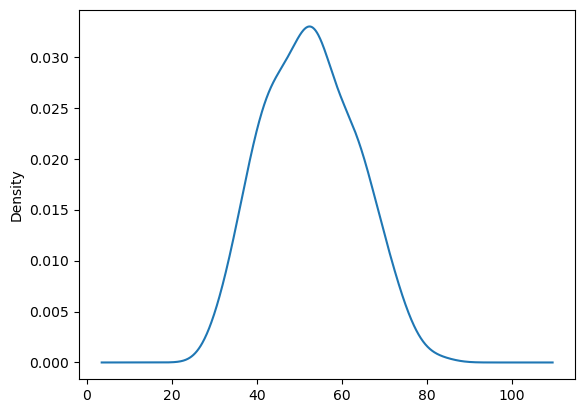

In [21]:
data["Age"].plot.density()

# Univarient Analysis

**Count Plot**

<Axes: xlabel='Survival', ylabel='count'>

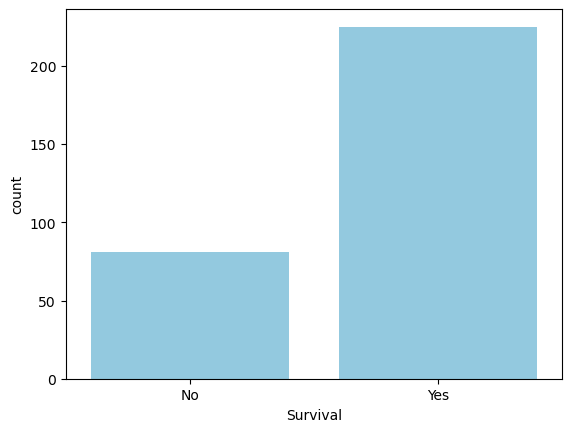

In [26]:
sns.countplot(x = "Survival", data=data , color='skyblue')

**Pie Chart**

Text(0.5, 1.0, 'Survival Percentage')

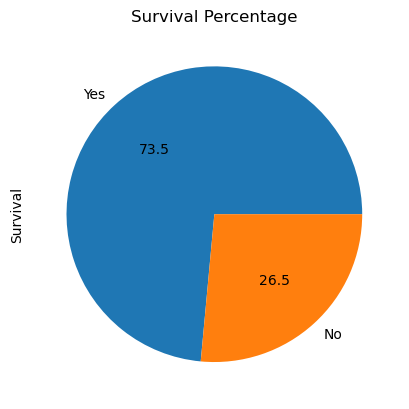

In [31]:
data["Survival"].value_counts().plot(kind="pie",autopct="%1.1f")

plt.title('Survival Percentage')

**Histogram**

Text(0.5, 1.0, 'Age')

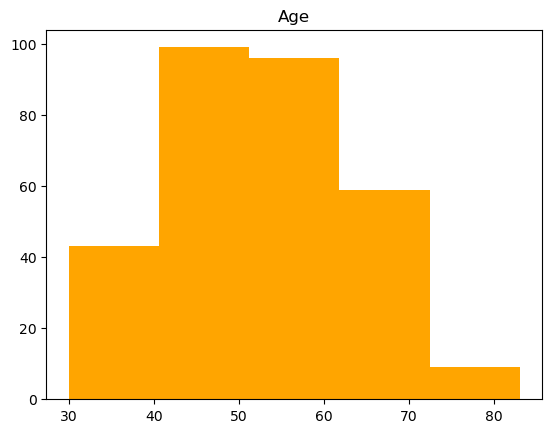

In [33]:
plt.hist(data["Age"], bins=5,color = 'orange')
plt.title('Age')

**Distplot**

C:\Users\HP\AppData\Local\Temp\ipykernel_20376\1779254536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"])


<Axes: xlabel='Age', ylabel='Density'>

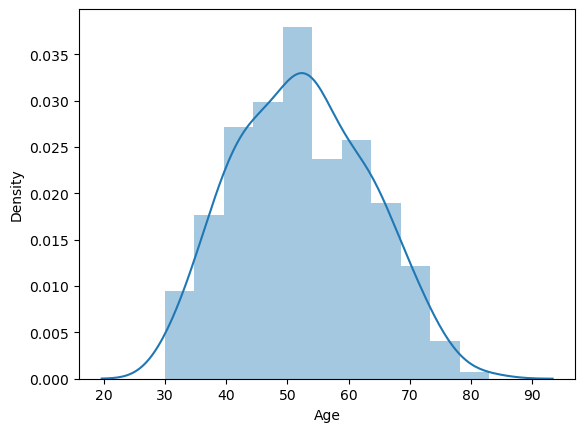

In [34]:
sns.distplot(data["Age"])

**Box Plot**

<Axes: >

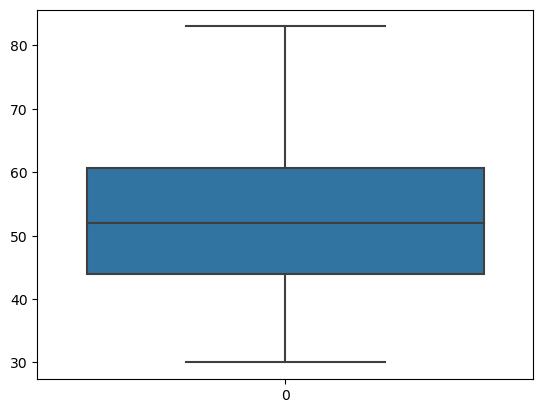

In [35]:
sns.boxplot(data["Age"])

<Axes: >

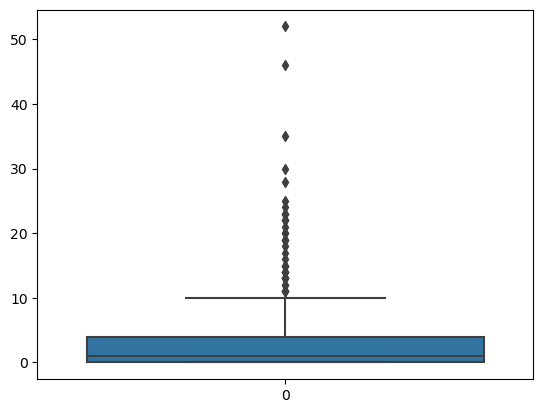

In [36]:
sns.boxplot(data["Nodes"])

# Multivarient Analysis

**Scatter plot**

<Axes: xlabel='Age', ylabel='Nodes'>

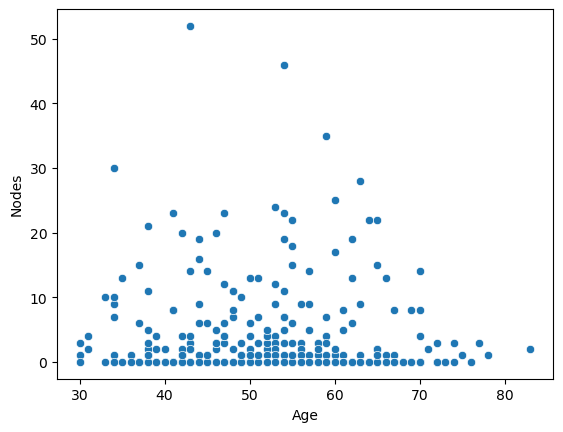

In [37]:
sns.scatterplot(x="Age" , y="Nodes" , data=data)

**Bar Plot**

<Axes: xlabel='Age', ylabel='Survival'>

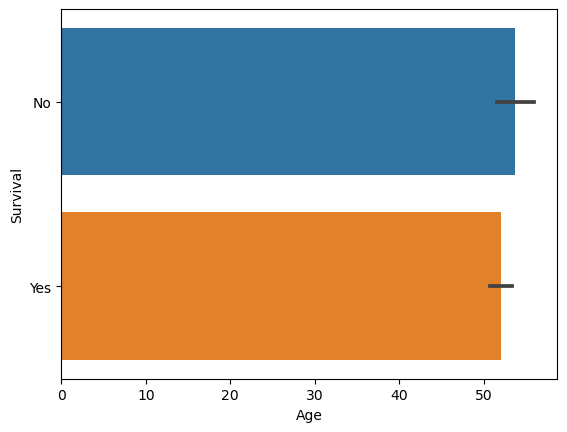

In [39]:
sns.barplot(x="Age",y="Survival" , data=data)

**Box Plot**

<Axes: xlabel='Age', ylabel='Survival'>

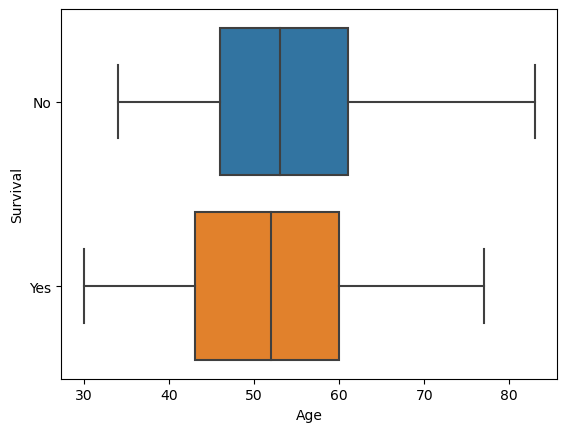

In [40]:
sns.boxplot(x="Age",y="Survival" , data=data)

**Distplot**

C:\Users\HP\AppData\Local\Temp\ipykernel_20376\3950880271.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"],data["Survival"] , hist= False)


<Axes: xlabel='Age', ylabel='Density'>

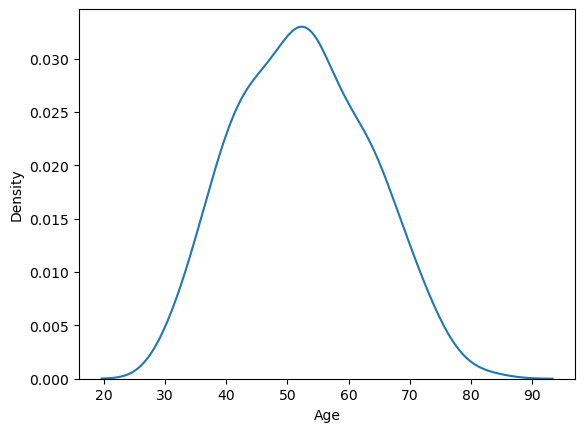

In [42]:
sns.distplot(data["Age"],data["Survival"] , hist= False)

In [44]:
data['Status']=data['Survival'].map({"Yes":"OK","No":"Not Okay"})

In [45]:
data.head()

,Age,Year,Nodes,Survival,Status
0,30,64,1,Yes,OK
1,30,62,3,Yes,OK
2,30,65,0,Yes,OK
3,31,59,2,Yes,OK
4,31,65,4,Yes,OK


In [46]:
pd.crosstab(data["Survival"],data["Status"])

Status,Not Okay,OK
Survival,,
No,81,0
Yes,0,225


**Heatmap**

<Axes: xlabel='Status', ylabel='Survival'>

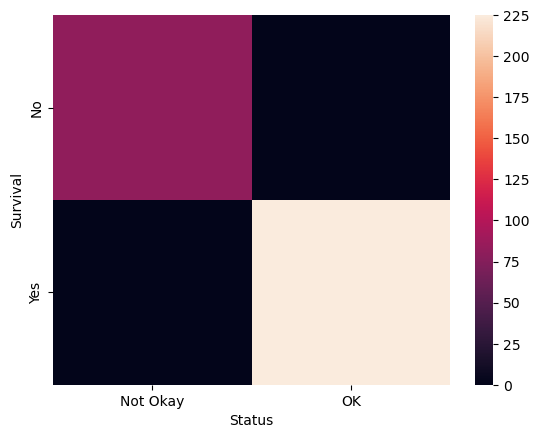

In [47]:
sns.heatmap(pd.crosstab(data["Survival"],data["Status"]))

**Pair Plot**

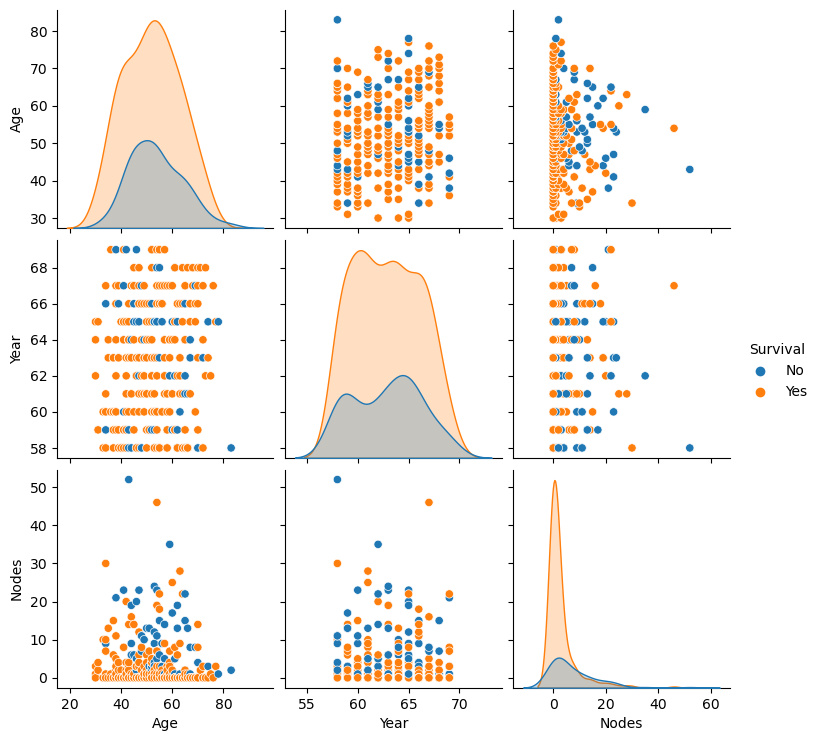

In [50]:
sns.pairplot(data , hue = 'Survival')